In [1]:
# Name: Suren Škardová
# SNR: 2054980

In [2]:
#!pip install --user mglearn 
#!pip install -U imbalanced-learn
#!pip install -U openml
#!pip install mlxtend 
#!pip install graphviz
#!pip install pydotplus
#import sys
#!{sys.executable} -m pip install scipy

In [1]:
# import libraries
import numpy as np
import pandas as pd
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from io import StringIO
import graphviz
import mglearn
import warnings
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
from sklearn.manifold import TSNE
from sklearn import metrics
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
# MODEL 1: K-NEAREST NEIGHBORS CLASSIFICATION

In [5]:
# loading data
data = np.load('data.npz')
print("data type: {}".format(type(data)))
print(data.files)
X = data['features']
y = data['labels']


data type: <class 'numpy.lib.npyio.NpzFile'>
['features', 'labels']


In [6]:
# printing information about the data and testing for missing values
print("data type X: {}".format(type(X)))
print("data type y: {}".format(type(y)))
print("shape X: {}".format(X.shape))
print("shape y: {}".format(y.shape))
print(np.ptp(X[0,:]))
print(np.isnan(np.min(X)))

data type X: <class 'numpy.ndarray'>
data type y: <class 'numpy.ndarray'>
shape X: (5645, 12)
shape y: (5645,)
234600.964
True


In [7]:
# splitting the data. missing values detected-> imputation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)
print(X_train)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


[[3.80000000e+01 5.31000000e-01 9.04000000e-01 ... 8.47000000e-01
  1.47846000e+02 2.05267000e+05]
 [3.70000000e+01 5.58000000e-01 3.57000000e-01 ... 6.91000000e-01
  1.19958000e+02 2.11947000e+05]
 [3.70000000e+01 6.32000000e-01 8.00000000e-01 ... 4.96000000e-01
  9.27570000e+01 2.09833000e+05]
 ...
 [1.70000000e+01 4.31000000e-01 7.95000000e-01 ... 5.58000000e-01
  1.47961000e+02 1.58945000e+05]
 [4.45121243e+01 4.09000000e-01 6.14000000e-01 ... 4.71000000e-01
  1.04887000e+02 2.99864000e+05]
 [1.60000000e+01 5.62000000e-01 6.06000000e-01 ... 5.60000000e-01
  1.42058000e+02 1.98078000e+05]]
X_train shape: (4233, 12)
y_train shape: (4233,)
X_test shape: (1412, 12)
y_test shape: (1412,)


In [8]:
# transforming data to dataframe (important for the graph)
X_df = pd.DataFrame(X_train)
y_df = pd.DataFrame(y_train)
print(X_df.head())
X_df.describe()


     0      1      2     3       4       5         6         7       8   \
0  38.0  0.531  0.904  11.0  -5.334  0.0443  0.000104  0.008870  0.0786   
1  37.0  0.558  0.357   2.0  -9.382  0.0983  0.896000  0.177562  0.3420   
2  37.0  0.632  0.800   5.0  -7.227  0.2340  0.547000  0.177562  0.1470   
3  39.0  0.506  0.583   9.0  -6.989  0.1080  0.133000  0.177562  0.2540   
4   9.0  0.369  0.387   5.0 -11.381  0.0359  0.993000  0.702000  0.1290   

      9        10             11  
0  0.847  147.846  205267.000000  
1  0.691  119.958  211947.000000  
2  0.496   92.757  209833.000000  
3  0.445  115.959  229037.000000  
4  0.746  167.715       2.974383  


0            1            2            3            4   \
count  4233.000000  4233.000000  4233.000000  4233.000000  4233.000000   
mean     43.902564     0.633136     0.610413     5.956992    -7.761332   
std      19.931556     0.151105     0.193745     3.000262     3.139621   
min       1.000000     0.138000     0.013200     1.000000   -26.964000   
25%      31.000000     0.535000     0.482000     4.000000    -9.248000   
50%      42.000000     0.639000     0.625000     5.952447    -7.186000   
75%      57.000000     0.740000     0.751000     8.000000    -5.647000   
max     100.000000     0.989000     0.997000    11.000000     0.119000   

                5            6            7            8            9   \
count  4233.000000  4233.000000  4233.000000  4233.000000  4233.000000   
mean      0.109109     0.322714     0.121548     0.193456     0.554860   
std       0.115682     0.300666     0.159671     0.166621     0.218297   
min       0.023200     0.000010     0.000001     0.015700     0.037900   
25%       0.038000     0.059000     0.000245     0.099300     0.394000   
50%       0.056000     0.225000     0.133000     0.129000     0.558000   
75%       0.130000     0.541000     0.177562     0.233000     0.721000   
max       0.955000     0.996000     0.985000     1.000000     0.984000   

                10             11  
count  4233.000000    4233.000000  
mean    119.058597  187573.329898  
std      28.323693   97021.204217  
min      49.320000       0.501650  
25%      97.189000  161091.000000  
50%     115.959000  197211.000000  
75%     136.994000  233227.000000  
max     216.053000  922506.000000

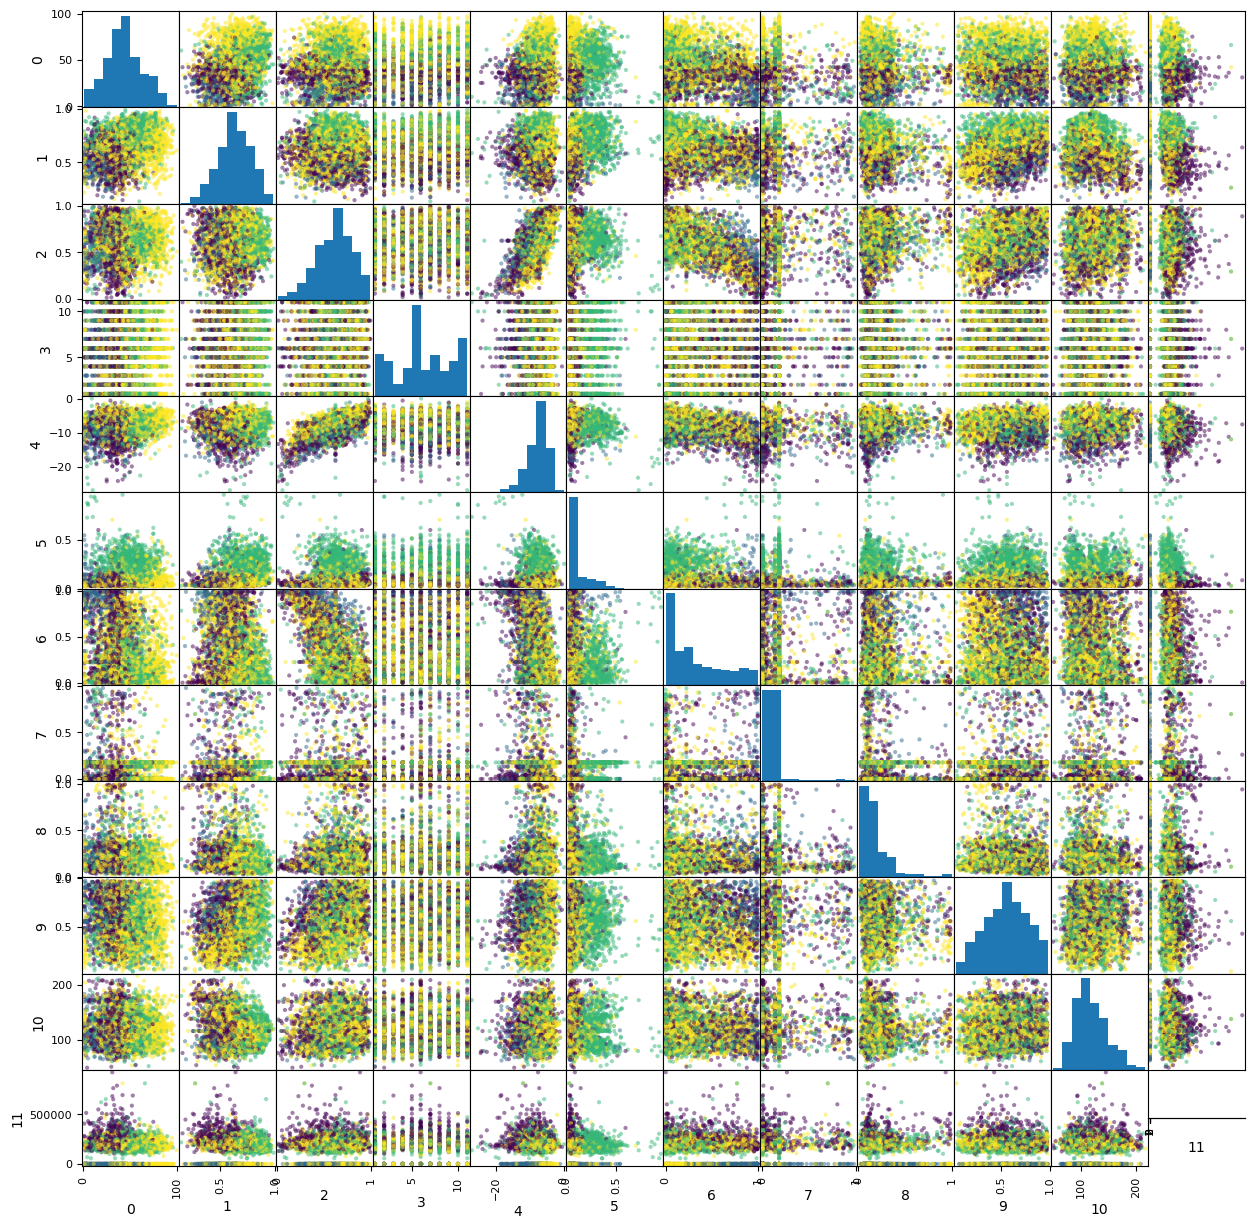

In [9]:
# plotting all variables
ggr = pd.plotting.scatter_matrix(X_df, c = y_train, figsize = (15, 15))
plt.imshow([np.unique(y_df)])
ggr = plt.xticks(ticks=np.unique(y_df))


In [9]:
# scaling features because we calculate distance in k-nn
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# printing number of samples -> unbalanced dataset
print("Number of samples:", X_train.shape)
print(pd.value_counts(y_df[0])) 


Number of samples: (4233, 12)
3    1893
2    1082
0     953
1     305
Name: 0, dtype: int64


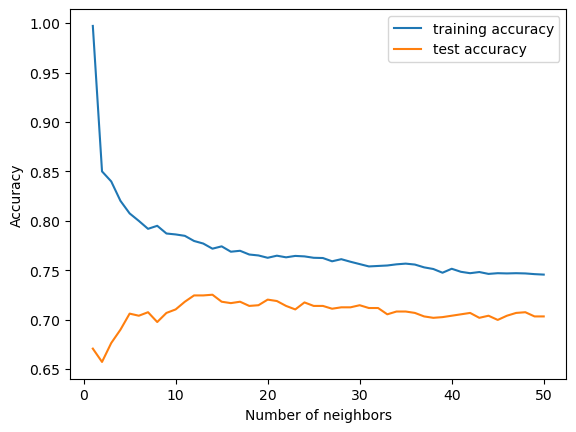

In [12]:
# plotting accuracies for 1-50 neighbors
training_accuracy = []
test_accuracy = []
neighbors_settings=range(1,51)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(10)    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()



In [11]:
# fitting the model for grid search
clf =KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range,  
                  metric= ['minkowski',"euclidean",'manhattan',"hamming"])
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)


Fitting 10 folds for each of 120 candidates, totalling 1200 fits


In [14]:
# printing best hyperparameters
print("Best parameters for our training dataset with tuning is: {}".format(grid_search.best_params_))
accuracy = grid_search.best_score_ 
print("Accuracy for our training dataset with tuning is: {:.2f}".format(accuracy))
results = pd.DataFrame(grid_search.cv_results_)
results=results.sort_values(by="rank_test_score")
display(results.head())


Best parameters for our training dataset with tuning is: {'metric': 'manhattan', 'n_neighbors': 17}
Accuracy for our training dataset with tuning is: 0.74


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
76       0.002900      0.000131         0.064986        0.002144    manhattan   
88       0.002928      0.000162         0.065989        0.003674    manhattan   
81       0.003255      0.000279         0.068992        0.002238    manhattan   
70       0.003057      0.000298         0.064735        0.004309    manhattan   
39       0.003193      0.000504         0.052882        0.001992    euclidean   

   param_n_neighbors                                      params  \
76                17  {'metric': 'manhattan', 'n_neighbors': 17}   
88                29  {'metric': 'manhattan', 'n_neighbors': 29}   
81                22  {'metric': 'manhattan', 'n_neighbors': 22}   
70                11  {'metric': 'manhattan', 'n_neighbors': 11}   
39                10  {'metric': 'euclidean', 'n_neighbors': 10}   

    split0_test_score  split1_test_score  split2_test_score  \
76           0.716981           0.738208           0.764151   
88           0.698113           0.752358           0.771226   
81           0.709906           0.745283           0.773585   
70           0.728774           0.731132           0.771226   
39           0.702830           0.745283           0.750000   

    split3_test_score  split4_test_score  split5_test_score  \
76           0.749409           0.747045           0.730496   
88           0.758865           0.735225           0.732861   
81           0.747045           0.735225           0.721040   
70           0.754137           0.728132           0.713948   
39           0.765957           0.754137           0.718676   

    split6_test_score  split7_test_score  split8_test_score  \
76           0.773050           0.735225           0.732861   
88           0.761229           0.737589           0.723404   
81           0.770686           0.732861           0.721040   
70           0.770686           0.728132           0.739953   
39           0.751773           0.739953           0.737589   

    split9_test_score  mean_test_score  std_test_score  rank_test_score  
76           0.758865         0.744629        0.016287                1  
88           0.754137         0.742501        0.020448                2  
81           0.768322         0.742499        0.021413                3  
70           0.754137         0.742026        0.018548                4  
39           0.747045         0.741324        0.017362                5

In [12]:
# fitting the model with the 3rd best parameters determined by grid search
clf = KNeighborsClassifier(n_neighbors=17, metric="manhattan")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

<AxesSubplot:>

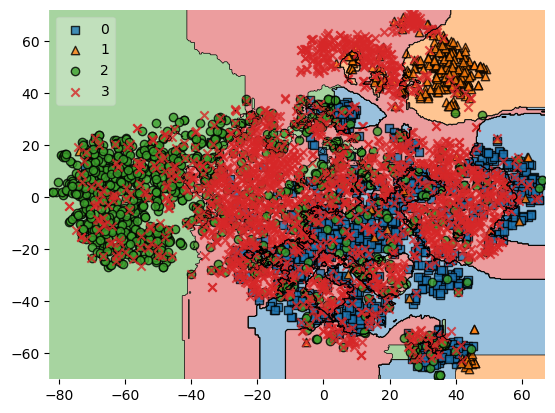

In [22]:
#t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_train)
clf.fit(tsne_results, y_train)
plot_decision_regions(tsne_results, y_train, clf=clf, legend=2)

In [21]:
# cross validation
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Labels:\n{}".format(y_train))

Cross-validation scores: [0.71698113 0.73820755 0.76415094 0.74940898 0.74704492 0.73049645
 0.77304965 0.73522459 0.73286052 0.75886525]
Average cross-validation score: 0.74
Labels:
[3 3 2 ... 3 0 3]


In [18]:
# printing accuracy, confusion matrix, classification report
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))
print(classification_report(y_test, pred))


Accuracy: 0.713
Confusion matrix:
[[194   0   9 116]
 [  3  87   0   7]
 [ 23   1 216 125]
 [ 55   4  62 510]]
              precision    recall  f1-score   support

           0       0.71      0.61      0.65       319
           1       0.95      0.90      0.92        97
           2       0.75      0.59      0.66       365
           3       0.67      0.81      0.73       631

    accuracy                           0.71      1412
   macro avg       0.77      0.73      0.74      1412
weighted avg       0.72      0.71      0.71      1412



In [19]:
# MODEL 2: DECISION TREE CLASSIFICATION

In [20]:
# loading data
data = np.load('data.npz')
print("data type: {}".format(type(data)))
print(data.files)
X = data['features']
y = data['labels']

data type: <class 'numpy.lib.npyio.NpzFile'>
['features', 'labels']


In [21]:
# printing information about the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

In [22]:
# splitting the data, imputation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

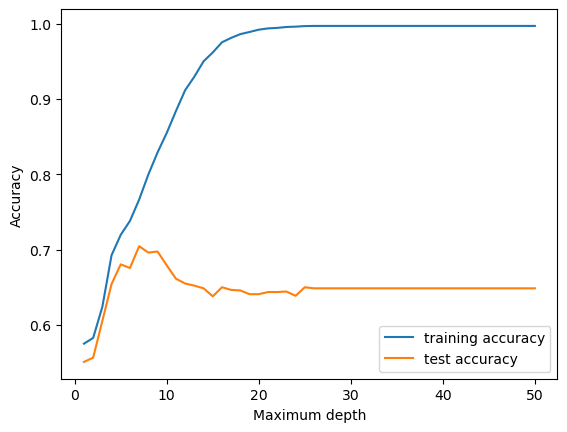

In [23]:
# plotting accuracies for 1-50 max_depth
training_accuracy = []
test_accuracy = []
max_depth=range(1,51)
for n_depth in max_depth:
    clf = DecisionTreeClassifier(max_depth=n_depth,random_state=42)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))


plt.figure(10)    
plt.plot(max_depth, training_accuracy, label="training accuracy")
plt.plot(max_depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Maximum depth")
plt.legend()

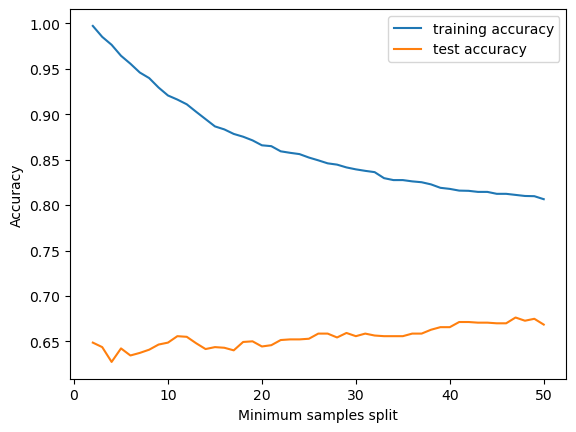

In [24]:
# plotting accuracies for 2-50 min_samples_split
training_accuracy = []
test_accuracy = []
min_samples_split=range(2,51)
for n_split in min_samples_split:
    clf = DecisionTreeClassifier(min_samples_split=n_split,random_state=42)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(10)    
plt.plot(min_samples_split, training_accuracy, label="training accuracy")
plt.plot(min_samples_split, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Minimum samples split")
plt.legend()

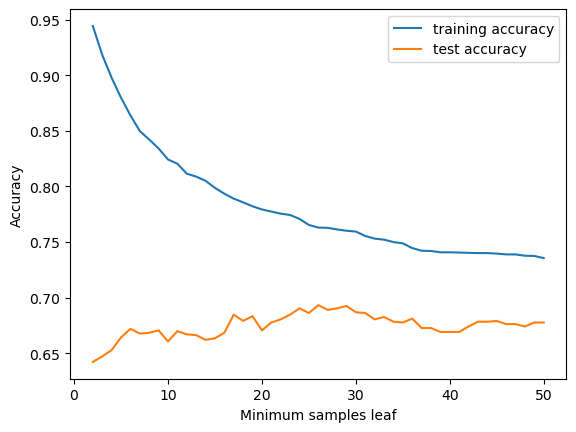

In [25]:
# plotting accuracies for 2-50 min_samples_leaf
training_accuracy = []
test_accuracy = []
min_samples_leaf=range(2,51)
for n_leaf in min_samples_leaf:
    clf = DecisionTreeClassifier(min_samples_leaf=n_leaf,random_state=42)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.figure(10)    
plt.plot(min_samples_leaf, training_accuracy, label="training accuracy")
plt.plot(min_samples_leaf, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Minimum samples leaf")
plt.legend()

In [26]:
# hyperparameters for tuning
param_dict = {
    "max_depth":range(5,11,2),
    "min_samples_split":range(10,26),
    "min_samples_leaf":range(5,11)
}

In [27]:
%%time 
# fitting the model for grid search
clf_grid = clf = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(clf_grid, param_grid = param_dict, cv=10, verbose=1, n_jobs=-1)
grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
CPU times: user 2.68 s, sys: 359 ms, total: 3.04 s
Wall time: 52.3 s


In [28]:
# printing best hyperparameters
print(grid_search.best_params_)
accuracy = grid_search.best_score_ 
print("Accuracy for our training dataset with tuning is : {:.2f}".format(accuracy))
results = pd.DataFrame(grid_search.cv_results_)
results=results.sort_values(by="rank_test_score")
display(results.head())

{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 25}
Accuracy for our training dataset with tuning is : 0.71


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
207       0.072416      0.009868         0.000915        0.000219   
206       0.083319      0.006743         0.001278        0.001166   
201       0.088657      0.009600         0.000876        0.000069   
205       0.086656      0.003988         0.000847        0.000072   
204       0.085651      0.007332         0.000950        0.000242   

    param_max_depth param_min_samples_leaf param_min_samples_split  \
207               9                      5                      25   
206               9                      5                      24   
201               9                      5                      19   
205               9                      5                      23   
204               9                      5                      22   

                                                params  split0_test_score  \
207  {'max_depth': 9, 'min_samples_leaf': 5, 'min_s...           0.681604   
206  {'max_depth': 9, 'min_samples_leaf': 5, 'min_s...           0.679245   
201  {'max_depth': 9, 'min_samples_leaf': 5, 'min_s...           0.679245   
205  {'max_depth': 9, 'min_samples_leaf': 5, 'min_s...           0.679245   
204  {'max_depth': 9, 'min_samples_leaf': 5, 'min_s...           0.679245   

     split1_test_score  ...  split3_test_score  split4_test_score  \
207           0.707547  ...           0.711584           0.699764   
206           0.707547  ...           0.711584           0.702128   
201           0.698113  ...           0.716312           0.704492   
205           0.709906  ...           0.711584           0.699764   
204           0.714623  ...           0.711584           0.699764   

     split5_test_score  split6_test_score  split7_test_score  \
207           0.718676           0.713948           0.728132   
206           0.718676           0.713948           0.728132   
201           0.718676           0.713948           0.725768   
205           0.721040           0.713948           0.728132   
204           0.721040           0.711584           0.725768   

     split8_test_score  split9_test_score  mean_test_score  std_test_score  \
207           0.718676           0.730496         0.714392        0.014811   
206           0.718676           0.730496         0.713921        0.014595   
201           0.718676           0.730496         0.713450        0.014919   
205           0.713948           0.728132         0.713447        0.014482   
204           0.713948           0.728132         0.713446        0.014232   

     rank_test_score  
207                1  
206                2  
201                3  
205                4  
204                5  

[5 rows x 21 columns]

In [29]:
%%time 
# building decision tree model
clf = DecisionTreeClassifier(max_depth=9, min_samples_split=25, min_samples_leaf=5,random_state=42)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

CPU times: user 57.3 ms, sys: 3.26 ms, total: 60.5 ms
Wall time: 68 ms


In [30]:
%%time 
# cross validation
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Labels:\n{}".format(y_train))

Cross-validation scores: [0.68160377 0.70754717 0.73349057 0.71158392 0.69976359 0.71867612
 0.71394799 0.72813239 0.71867612 0.73049645]
Average cross-validation score: 0.71
Labels:
[3 3 2 ... 3 0 3]
CPU times: user 466 ms, sys: 6.83 ms, total: 473 ms
Wall time: 502 ms


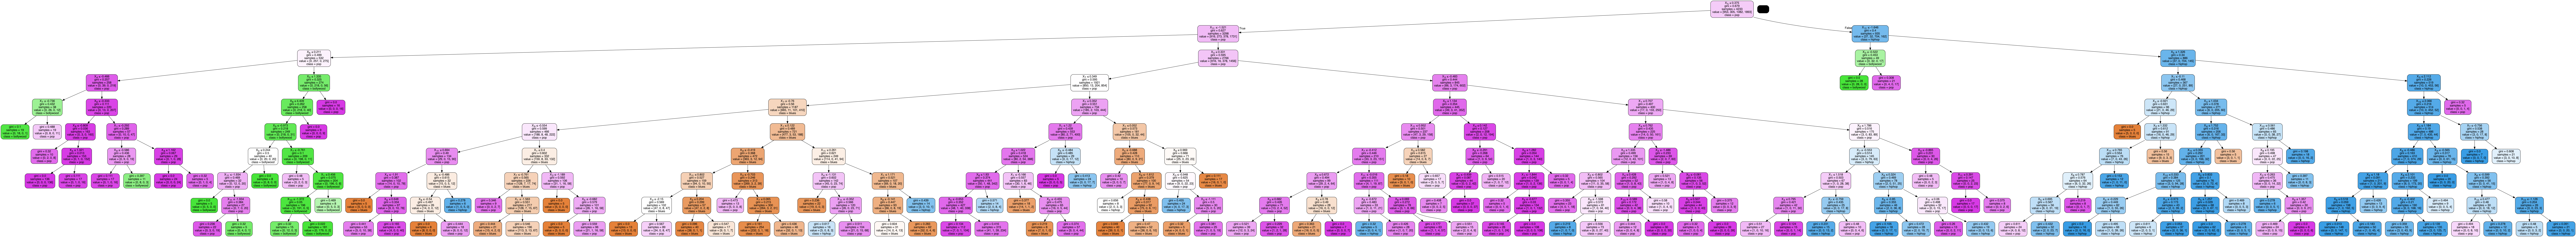

In [31]:
# graphing decision tree
dot_data = export_graphviz(clf,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"5,5!"')
pydot_graph.write_png('resized_tree.png')

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               class_names=['blues','bollywood', "hiphop", "pop"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

Feature importances:
[0.13179189 0.0604075  0.01742915 0.00104184 0.05149059 0.29448609
 0.07968795 0.11678186 0.02422935 0.04936761 0.01057123 0.16271494]


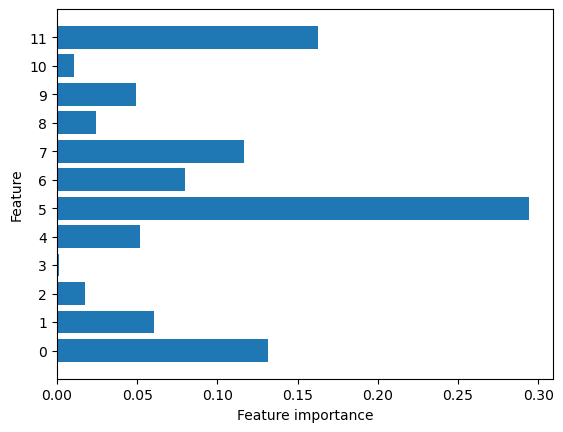

In [32]:
# printing best features
print("Feature importances:\n{}".format(clf.feature_importances_))
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features)) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(clf)

In [33]:
# fitting the model with the 3rd best parameters determined by grid search
# printing predictions and accuracy
print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))
print("Classification report:\n{}".format(classification_report(y_test, y_pred)))

Accuracy: 0.703
Confusion matrix:
[[208   0  19  92]
 [  3  83   0  11]
 [ 23   0 225 117]
 [ 65  10  79 477]]
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       319
           1       0.89      0.86      0.87        97
           2       0.70      0.62      0.65       365
           3       0.68      0.76      0.72       631

    accuracy                           0.70      1412
   macro avg       0.74      0.72      0.73      1412
weighted avg       0.70      0.70      0.70      1412

